# E4-Data Science Experiments and Sampling Distribution
adaptation from Peter C. Bruce, Andrew Bruce, Peter Gedeck

In [1]:
# import libraries
%matplotlib inline
import matplotlib.pylab as plt
import random

import pandas as pd
import numpy as np

from scipy import stats
from sklearn.utils import resample

import seaborn as sns


## Samples and Distribution

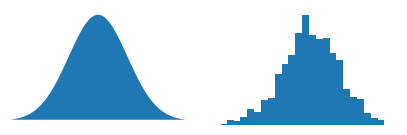

In [2]:
# generate and visualize a random set
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()

### Sampling Distribution

The distribution of a measure (statistic) of a sample, when observed in many different samples drawn from the same population. Happens to take normal distribution (bell curve)!

In [3]:
# This is an example of creating three samples from the same population, applying three different techniques
# The population consists of people applying for a loan, here is their income
loans = pd.read_csv("../data/loans_income.csv", squeeze=True)

# take 1000 values
sample1 = pd.DataFrame({'income': loans.sample(1000),'from': 'data'})

# take the means of 5 values 1000 times
sample2 = pd.DataFrame(
    {'income': [loans.sample(5).mean() for _ in range(1000)], 'from': 'mean5'})

# take the means of 20 values 1000 times
sample3 = pd.DataFrame({
    'income': [loans.sample(20).mean() for _ in range(1000)], 'from': 'mean20'})

/var/folders/vm/wbcfv4bn6fvggqz29dlb30xw0000gr/T/ipykernel_8300/4030578049.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  loans = pd.read_csv("../data/loans_income.csv", squeeze=True)


In [4]:
sample1

,income,from
40292,63000,data
38959,92000,data
17361,134000,data
33996,52000,data
26491,43000,data
...,...,...
31345,110000,data
12399,60000,data
15,36000,data
9943,48000,data


In [5]:
# A new collection
allsamples = pd.concat([sample1, sample2, sample3])
print(allsamples.tail())

       income    from
995  70262.50  mean20
996  75054.00  mean20
997  79831.55  mean20
998  69985.40  mean20
999  70359.20  mean20


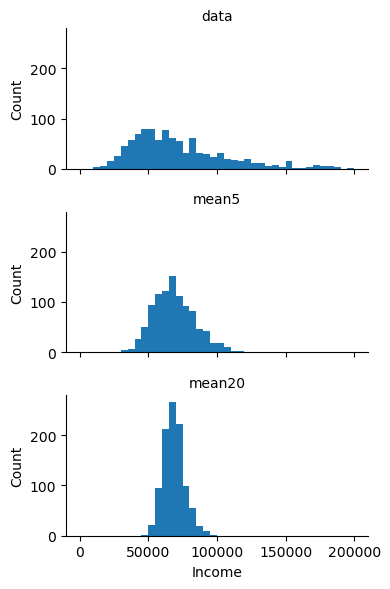

In [6]:
# The histograms show that avearage values are also normally distrubuted - Central Limit Theorem
g = sns.FacetGrid(allsamples, col='from', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

###  Bootstrap Resampling
1. Choose the size of the new sample
2. While not yet the new sample filled in:
- randomly select an observation from the original dataset
- add it to the new sample
3. Calculate statistics of the new sample

In [7]:
# bootstraping by method resample() from scikit-learn library
newsam = []
for i in range(1000):
    sample = resample(loans, replace=True)
    newsam.append(sample.median())
newsam = pd.Series(newsam)
print('Bootstrap Statistics:')
print(f'original median: {loans.median()}')
print(f'newsam median: {newsam.median()}')
print(f'bias: {newsam.mean() - loans.median()}')
print(f'std. error: {newsam.std()}')

Bootstrap Statistics:
original median: 62000.0
newsam median: 62000.0
bias: -82.09799999999814
std. error: 228.73933106830748


### Confidence Intervals

### 90% 

In [8]:
# start observing the means of a population
print('original mean: ', loans.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample = resample(loans, n_samples=20, replace=False)
print('sample mean: ', sample.mean())

original mean:  68760.51844
sample mean:  55734.1


In [9]:
# resample 500 times and record the means
results = []
for i in range(500):
    newsample = resample(sample)
    results.append(newsample.mean())
results = pd.Series(results)
results

0      47060.0
1      52950.0
2      63918.2
3      40156.0
4      46462.0
        ...   
495    56667.4
496    45006.0
497    69932.2
498    57899.1
499    58564.1
Length: 500, dtype: float64

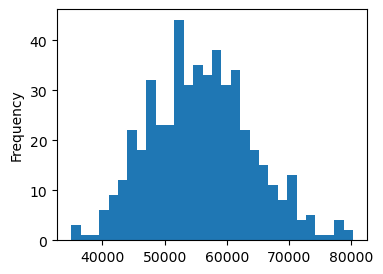

In [10]:
# plot the sampling distribution
ax = results.plot.hist(bins=30, figsize=(4, 3))

Text(56722.94499999999, 60, '90% interval')

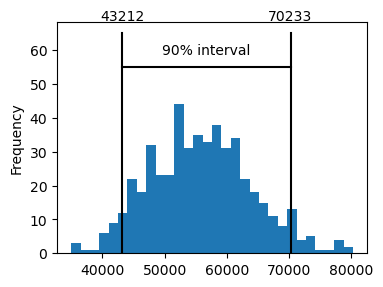

In [11]:
# create 90% convidence interval - leave 5% out at each side
confidence_interval = list(results.quantile([0.05, 0.95]))

# plot it over the histigram
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')

# plot the vertical borders
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', horizontalalignment='center', verticalalignment='center')

# add title  
ax.text(sum(confidence_interval) / 2, 60, '90% interval', horizontalalignment='center', verticalalignment='center')
   

### 90% and 95%

Text(0, 0.5, 'Counts')

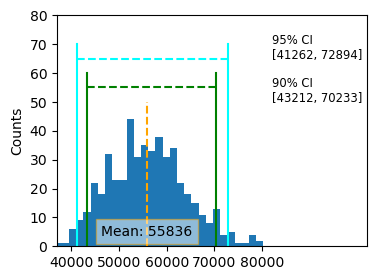

In [12]:
np.random.seed(seed=3)

# create a sample of 20 loan income data
sample20 = resample(loans, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

# create 90% confidence interval and plot it
confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='green', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='green')
ax.text(82000, 50, f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]', fontsize='small')

# create 95% confidence interval and plot it
confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='cyan', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='cyan')
ax.text(82000, 65, f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]', fontsize='small')

# create and plot the mean of the distribution
meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='orange', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='orange', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')

# format the plot area
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()